In [138]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from scipy.integrate import odeint
import matplotlib as mpl
import random

# Assignment 5 : Plotting ODE

Aditya Moger, 20211062

1. Write code to use matplotlib's quiver() function to plot phase diagrams for 1st and second order autonomous ODEs.
2. Reproduce the phase plot for Eq. 2.42 in the textbook.
3. Find the roots, classify them and plot the phase portrait for the predator-prey system of Eq. 5.3 in the textbook

Let's first make functions for the differential equations, 2.42 and 5.3, as given in the book

In [197]:

def diff_eq_2_42(x_vector,t):
    x= x_vector[0]
    y= x_vector[1]
    v = np.exp(x)*(y**3)-2*y
    u= 1
    return [u,v]


In [198]:
def diff_eq_5_3(x_vector,t):
    x= x_vector[0]
    y= x_vector[1]

    u = x*(2- (3*x)) - (4*x*y)
    v = (- y) + 3* x * y
    
    return [u,v]

Note that the "t" is for the package odeint to work on the differential equation function.
<br> <br>
Let's define the function that will plot the phase portrait of the given differential equation. Do note however that for second order differential equations, only the x' vs x phase portrait is plotted as that the only phase portrait with unique solution for any given (x',x).

In [200]:
def plot_phase_portrait(diff_eq, range_of_x, range_of_y, step_size_x, step_size_y):
    # Plot vector field
    
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.axvline(x=0, c="black")
    ax.axhline(y=0, c="black")
    
    nx, ny = step_size_x, step_size_y

    min_x, max_x= range_of_x
    min_y, max_y= range_of_y

    x = np.arange(min_x, max_x, nx)
    y = np.arange(min_y, max_y, ny)

    X, Y = np.meshgrid(x,y)
    
    u, v = diff_eq(x_vector=[X,Y], t=0)

    dyu = v/ np.sqrt(u**2 + v**2)
    dxu = u/ np.sqrt(u**2 + v**2)

    n = -0.01
    color_array = np.sqrt(((dxu-n)/2)**2 + ((dyu-n)/2)**2)

    ax.quiver(X,Y, dxu, dyu, color_array)


Let's now use the odeint package to plot the effect of time progression on how the states evolve, given an initial condition.

In [223]:
def plot_time_progression_given_ic(diff_eq, given_initial_conditions, time_durations):

    initial_conditions = []
    durations =[]
    for i in range (0, len(given_initial_conditions)):
        initial_conditions.append(given_initial_conditions[i])
        durations.append([0,time_durations[i]])

    #vcolors = plt.cm.twilight_shifted(np.linspace(random.uniform(0,1), 1., 2))  
    #random color generation for fun, impliment if needed

    # plot trajectories
    for i, initial_condition in enumerate(initial_conditions):

        t = np.linspace(durations[i][0], durations[i][1], 1000)
        x = odeint(diff_eq, initial_condition, t)

        plt.plot(x[:,0], x[:,1])#, color=vcolors[i])
        
    ic_x = [ic[0] for ic in initial_conditions]
    ic_y = [ic[1] for ic in initial_conditions]

    plt.scatter(ic_x, ic_y, color='blue', s=20)
    

### Finally, time to plot them!!!

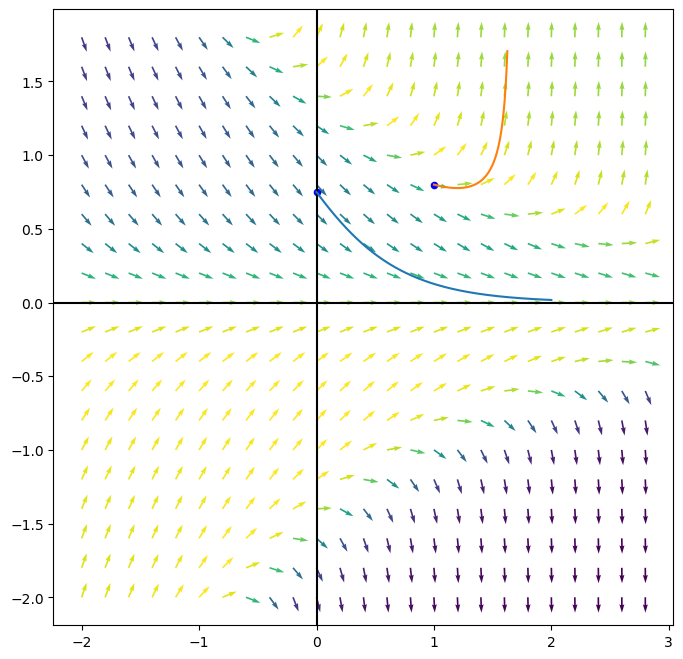

In [224]:
%matplotlib inline
plot_phase_portrait(diff_eq=diff_eq_2_42, range_of_x=[-2,3], range_of_y=[-2,2], step_size_x=.2, step_size_y=.2)
plot_time_progression_given_ic(diff_eq=diff_eq_2_42, given_initial_conditions=([0,0.75],[1,0.8]), time_durations=(2, 0.625))

#feel free to change around the parameters or add more, but be careful because sometimes the values explode to large numbers very fast. 
#also make sure that number of time durations given match the number of initial conditions


C:\Users\adity\AppData\Local\Temp\ipykernel_7580\1052281600.py:20: RuntimeWarning: invalid value encountered in divide
  dyu = v/ np.sqrt(u**2 + v**2)
C:\Users\adity\AppData\Local\Temp\ipykernel_7580\1052281600.py:21: RuntimeWarning: invalid value encountered in divide
  dxu = u/ np.sqrt(u**2 + v**2)


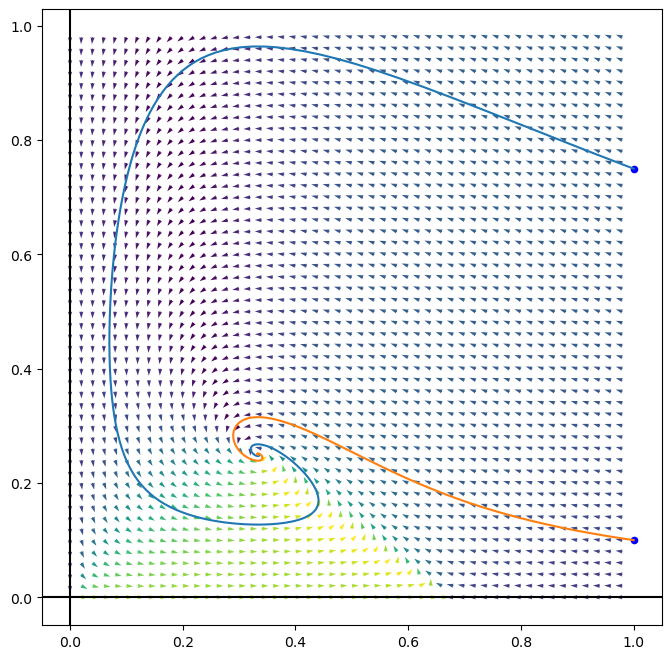

In [226]:
plot_phase_portrait(diff_eq=diff_eq_5_3, range_of_x=[0,1], range_of_y=[0,1], step_size_x=.02, step_size_y=.02)
plot_time_progression_given_ic(diff_eq=diff_eq_5_3, given_initial_conditions=([1,0.75],[1,0.1]), time_durations=(21, 21))

#feel free to change around the parameters, but be careful because sometimes the values explode to large numbers very fast.
#also make sure that number of time durations given match the number of initial conditions

Now let's solve for the equilibrium soltions of the equation, 5.3.
<br>
Let's set x' and y' to 0. We get two equations, <br>
x (2 -3x -4y) = 0 <br>
y (3x-1) = 0 <br>

Let's solve these case by case, second eq is zero when y=0 or x=1/3 <br>
- When y=0, x(2-3x)=0. Hence x=2/3 or x=0
- When x=1/3, (1/3)*(2 -1 -4y)=0. Hence y=1/4
<br><br>
Hence equilibrium solutions are (0,0), (0,2/3), or (1/3, 1/4)

C:\Users\adity\AppData\Local\Temp\ipykernel_7580\1052281600.py:20: RuntimeWarning: invalid value encountered in divide
  dyu = v/ np.sqrt(u**2 + v**2)
C:\Users\adity\AppData\Local\Temp\ipykernel_7580\1052281600.py:21: RuntimeWarning: invalid value encountered in divide
  dxu = u/ np.sqrt(u**2 + v**2)


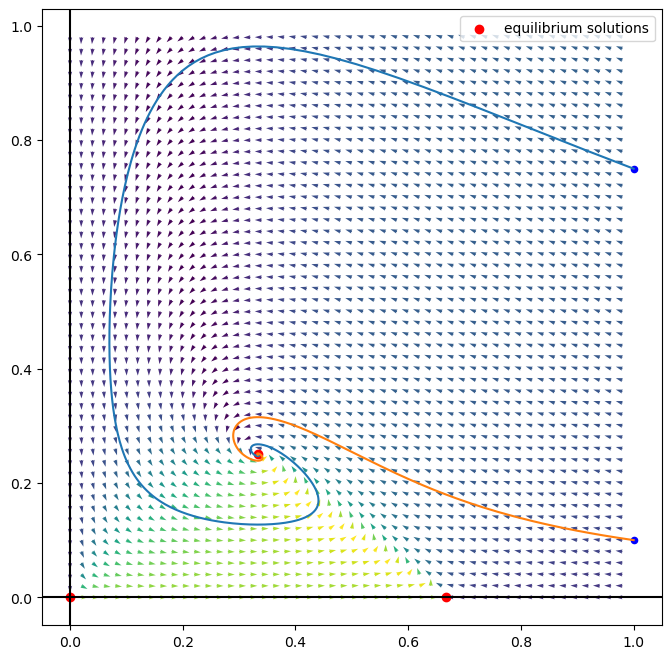

In [235]:
eq_solutions= np.array([[0,0] ,[2/3,0] ,[1/3,1/4]])

plot_phase_portrait(diff_eq=diff_eq_5_3, range_of_x=[0,1], range_of_y=[0,1], step_size_x=.02, step_size_y=.02)
plot_time_progression_given_ic(diff_eq=diff_eq_5_3, given_initial_conditions=([1,0.75],[1,0.1]), time_durations=(21, 21))

plt.scatter(eq_solutions[:,0], eq_solutions[:,1], color="red", label="equilibrium solutions")
plt.legend()

We can now compute the matrices by computing the jacobian and using change of basis, and find the equilibrium type at each of these points.
<br>


In [246]:
eq_solution_vectors=np.array([[0,0] ,[2/3,0] ,[1/3,1/4]])

for i in range(0,len(eq_solution_vectors)):
    x= eq_solution_vectors[i][0]
    y= eq_solution_vectors[i][1]
    jacobian= np.matrix([[2-6*x-4*y, -4*x],
                         [3*y      , 3*x-1]])
    print("solution",eq_solution_vectors[i], ", eigen values",np.linalg.eigvals(jacobian),", trace",np.trace(jacobian), ", determinant", np.linalg.det(jacobian))
    
    print("matrix")
    print(jacobian)
    print("_________________________")


solution [0. 0.] , eigen values [ 2. -1.] , trace 1.0 , determinant -2.0
matrix
[[ 2. -0.]
 [ 0. -1.]]
_________________________
solution [0.66666667 0.        ] , eigen values [-2.  1.] , trace -1.0 , determinant -2.0
matrix
[[-2.         -2.66666667]
 [ 0.          1.        ]]
_________________________
solution [0.33333333 0.25      ] , eigen values [-0.5+0.8660254j -0.5-0.8660254j] , trace -1.0 , determinant 1.0
matrix
[[-1.         -1.33333333]
 [ 0.75        0.        ]]
_________________________


Let's characterize the points based on Table 5.1 from the book.
<br>
1. For the point (0,0), [-1<0<2] and det is negative and hence it is a saddle point.
2. For point (2/3,0), [-2<0<1] and det is negative and hence it is a saddle point.
3. For point (1/3, 1/4), eigen values are complex and real parts are less than 0. Also trace is negative and determinant is positive. Therefore it is a spiral sink!!!
 